In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

source_dir = '/Users/mdeverna/Documents/Projects/mean_field_quals/src'
sys.path.insert(0,source_dir)


from simulations import run_simulation, get_peak_day, deriv_simple, deriv_with_homophily

In [2]:
S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
    frac_ord = .5,
    prop_infec=.001,
    num_days=100,
    beta_ord=.3,
    recovery_days=7,
    beta_mult=2,
    w_homophily=True,
    alpha = .9,
    mixed=False,
    counts=False,
    N=None,
)

In [3]:
# Fraction of ordinary people
x = .5

# All beta values
beta = .3
beta_mult = 3

# Less beta values highlighted for one of the later plots
alphas = [0.5, 0.6, 0.7, 0.8, 0.9, .98, 1.]
alphas = np.arange(.5,1.02,.02)

totals = []      # Total infections
r0s_ = []        # R0 valuyes
peak_days = []   # Date of each peak

# Will store the progression of infections over time, indexed by beta values
infection_flows = dict()

totals_dict = dict()


for mix in [True, False]:
    
    totals = []      # Total infections
    
    for alpha in alphas:

        # Run the simulation based on the input 
        S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
            frac_ord=x,
            prop_infec=.001,
            num_days=100,
            beta_ord=beta,
            recovery_days=5,
            beta_mult=beta_mult,     # Multiply the current beta value by this to get the misinfo group beta
            w_homophily=True,
            alpha=alpha,
            mixed=mix,
        )
        total_ord_inf = max(R_o)
        total_mis_inf = max(R_m)

        infection_flows[alpha] = I_o

        r0s_.append( (r0s[0], r0s[1], r0s[2], beta) )

        totals.append((alpha, total_ord_inf, total_mis_inf, total_ord_inf + total_mis_inf))
    
    totals_df = pd.DataFrame(totals, columns = ['alpha', 'ord_inf', 'mis_inf', 'total'])
    totals_df = totals_df.melt(id_vars='alpha')

    var_map ={
        'mis_inf':'misinformed',
        'ord_inf':'ordinary',
        'total' : 'all'
    }

    totals_df.variable = totals_df.variable.map(var_map)
    
    print(mix)
    if mix:
        name = "mixed"
    else:
        name = "not mixed"
    
    totals_dict[name] = totals_df

True
False


In [4]:
num_days = 100
x = 0.5  # Initial proportion of ordinary people
prop_infected = 0.001  # Initial proportion of infected
rec_days = 5

# Fixed based on results from previous analyses
beta = 0.3
lambduh = 3  # beta_misinformed = lambda * beta_ord

# Homophily
alphas = np.arange(.5,1.02,.02)

# Result storage
totals = []  # Total infections
infection_flows = dict()  # Daily infections

# Run simulations
for alpha in alphas:

        # Run the simulation based on the input 
        S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
            frac_ord=x,
            prop_infec=prop_infected,
            num_days=num_days,
            beta_ord=beta,
            recovery_days=rec_days,
            beta_mult=lambduh,
            w_homophily=True,
            alpha=alpha,
            mixed=False,
        )
        total_ord_inf = max(R_o)
        total_mis_inf = max(R_m)

        infection_flows[alpha] = I_o + I_m

        totals.append({
            "alpha": alpha,
            "total_ord_inf": total_ord_inf,
            "total_mis_inf": total_mis_inf,
            "total": total_ord_inf + total_mis_inf
        })

In [5]:
### Total proportion of the network that gets infected ###
total_infected_df = pd.DataFrame(totals)

### Daily proportion of the network that gets infected ###
daily_infected_df = pd.DataFrame(infection_flows).reset_index()
daily_infected_df = daily_infected_df.rename(columns={"index": "day"})
daily_infected_df.day = daily_infected_df.day + 1
daily_infected_df = daily_infected_df.melt(id_vars="day")
daily_infected_df.rename(columns={"variable": "alpha"}, inplace=True)
daily_infected_df.rename(columns={"value": "prop_infected"}, inplace=True)

In [6]:
daily_infected_df

,day,alpha,prop_infected
0,1,0.5,1.000000e-03
1,2,0.5,1.399100e-03
2,3,0.5,1.956852e-03
3,4,0.5,2.735724e-03
4,5,0.5,3.822205e-03
...,...,...,...
2595,96,1.0,6.820097e-09
2596,97,1.0,5.486043e-09
2597,98,1.0,4.412879e-09
2598,99,1.0,3.549578e-09


In [7]:
total_infected_df.head()

,alpha,total_ord_inf,total_mis_inf,total
0,0.50,0.367138,0.492682,0.859821
1,0.52,0.365808,0.492856,0.858664
2,0.54,0.364424,0.493029,0.857453
3,0.56,0.362982,0.493204,0.856186
4,0.58,0.361479,0.493379,0.854858


In [8]:
def combine_colors(color1, color2):
    # Convert hex color codes to RGB values
    r1, g1, b1 = int(color1[1:3], 16), int(color1[3:5], 16), int(color1[5:7], 16)
    r2, g2, b2 = int(color2[1:3], 16), int(color2[3:5], 16), int(color2[5:7], 16)
    
    # Calculate average RGB values
    avg_r = (r1 + r2) #// 2
    avg_g = (g1 + g2) #// 2
    avg_b = (b1 + b2) #// 2
    
    # Convert average RGB values to hex color code
    combined_color = f"#{avg_r:02x}{avg_g:02x}{avg_b:02x}"
    
    return combined_color


In [9]:
combine_colors("FF0060", "0079FF")

'#f7a50f'

In [10]:
{
 .5: "#abc9c8",
 .6: "#72aeb6",
 .7:"#4692b0",
 .8:"#2f70a1",
 .9:"#134b73",
 1.0:"#0a3351"
    }

{0.5: '#abc9c8',
 0.6: '#72aeb6',
 0.7: '#4692b0',
 0.8: '#2f70a1',
 0.9: '#134b73',
 1.0: '#0a3351'}

In [11]:
daily_infected_df

,day,alpha,prop_infected
0,1,0.5,1.000000e-03
1,2,0.5,1.399100e-03
2,3,0.5,1.956852e-03
3,4,0.5,2.735724e-03
4,5,0.5,3.822205e-03
...,...,...,...
2595,96,1.0,6.820097e-09
2596,97,1.0,5.486043e-09
2597,98,1.0,4.412879e-09
2598,99,1.0,3.549578e-09


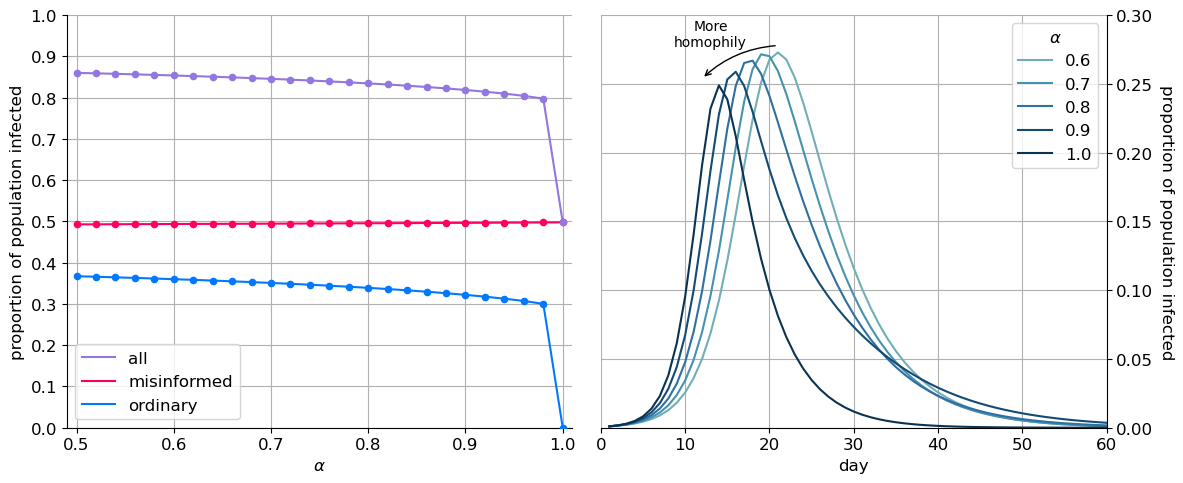

In [22]:
import matplotlib.patches as patches

# Set the font size for all text
plt.rcParams.update({"font.size": 12})

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

col_2_group = {
    "total_mis_inf":"misinformed",
    "total_ord_inf": "ordinary",
    "total":"combined"
}

group_color_map = {
    "misinformed" : "#FF0060", # red
    "ordinary" : "#0079FF", # blue
    "combined" : "#9376E0" # purple
}

homophily_color_map = {
 .5: "#abc9c8",
 .6: "#72aeb6",
 .7:"#4692b0",
 .8:"#2f70a1",
 .9:"#134b73",
 1.0:"#0a3351"
}

### Total infected figure

for col in ['total_ord_inf', 'total_mis_inf', 'total']:

    ax[0].plot(
        total_infected_df["alpha"],
        total_infected_df[col],
        color = group_color_map[col_2_group[col]],
        label = "all" if col_2_group[col] == "combined" else col_2_group[col]
    )
    ax[0].scatter(
        total_infected_df["alpha"],
        total_infected_df[col],
        color = group_color_map[col_2_group[col]],
        marker='o',
        s=20,
        zorder=3
    )

ax[0].grid(True)
ax[0].set_ylim((0,1))
ax[0].set_yticks(np.arange(0,1.1,.1))

ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)


ax[0].set_ylabel("proportion of population infected")
ax[0].set_xlabel(r'$\alpha$')


# Specify the desired order of legend labels
desired_order = ['all', 'misinformed', 'ordinary']

# Get the handles and labels of the current legend
handles, labels = ax[0].get_legend_handles_labels()

# Create a dictionary to map labels to handles
handle_dict = dict(zip(labels, handles))

# Create a list of handles in the desired order
sorted_handles = [handle_dict[label] for label in desired_order]

# Create a list of labels in the desired order
sorted_labels = desired_order

# Create the legend with the desired order
ax[0].legend(sorted_handles, sorted_labels)


### Daily infections figure

values_to_match = [0.6, 0.7, 0.8, 0.9, 1.0]

daily_infected_df.alpha = daily_infected_df.alpha.astype(float)
less_daily = daily_infected_df[np.isin(daily_infected_df.alpha.round(2), values_to_match)]


for alpha in less_daily.alpha.round(2).unique():
    
    temp_df = less_daily[
        np.isclose(less_daily.alpha, alpha) # Pandas float storage is so annoying
    ]
    max_prop = temp_df['prop_infected'].max()
    max_day = get_peak_day(temp_df['prop_infected'])
        
    
    ax[1].plot(
        temp_df['day'],
        temp_df['prop_infected'],
        color = homophily_color_map[alpha],
        label = alpha
    )

# Add arrow
highest_point = less_daily[
        np.isclose(less_daily.alpha, .6)
    ]
h_max_prop = highest_point['prop_infected'].max()
h_max_day = get_peak_day(highest_point['prop_infected'])

lowest_point = less_daily[
        np.isclose(less_daily.alpha, 1.0)
    ]
l_max_prop = lowest_point['prop_infected'].max()
l_max_day = get_peak_day(lowest_point['prop_infected'])

arr_buffer = .005
text_buffer = .005

# Create a curved arrow patch
arrow = patches.FancyArrowPatch(
    (h_max_day+1, h_max_prop+arr_buffer),  # Starting point (x, y)
    (l_max_day-1, l_max_prop+arr_buffer),  # Ending point (x, y)
    connectionstyle="arc3,rad=.18",  # Connection style for the arrow
    arrowstyle='->',  # Arrow style
    linewidth=1,  # Arrow linewidth
    edgecolor='black',  # Arrow edge color
    mutation_scale=10,
    zorder=3
)
ax[1].add_patch(arrow)

# Add an annotation above the arrow
middle_x = 13
middle_y = .275
ax[1].annotate(
    'More\nhomophily',
    xy=(middle_x, middle_y),  # Annotation position (x, y)
    xytext=(middle_x, middle_y),  # Text position (x, y)
    ha='center',  # Horizontal alignment
    va='bottom',  # Vertical alignment
    fontsize=10,
    zorder=3
)

ax[1].set_ylim(0,.3)
ax[1].set_xlim(0,60)
ax[0].set_xlim(0.49,1.01)

ax[1].grid(True)
# Move the y-axis of the right spanning plot to the right side
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

ax[1].spines["top"].set_visible(False)
ax[1].spines["left"].set_visible(False)

ax[1].legend(title = r"$\alpha$")

ax[1].set_ylabel("proportion of population infected", rotation=-90, va='bottom')
ax[1].set_xlabel('day')

plt.tight_layout()

In [23]:
middle_y

0.275

In [24]:
middle_x

13

In [25]:
get_peak_day(daily_infected_df[np.isclose(daily_infected_df.alpha, .9)]['prop_infected'])

15

In [26]:
get_peak_day(daily_infected_df[np.isclose(daily_infected_df.alpha, 1.0)]['prop_infected'])

13

In [27]:
daily_infected_df[
    (np.isclose(daily_infected_df.alpha, .6)) \
    & (daily_infected_df.day == 20)
]

,day,alpha,prop_infected
519,20,0.6,0.267545


In [28]:
daily_infected_df[
    (np.isclose(daily_infected_df.alpha, .7)) \
    & (daily_infected_df.day == 18)
]

,day,alpha,prop_infected
1017,18,0.7,0.260647


In [29]:
daily_infected_df[
    (np.isclose(daily_infected_df.alpha, .8)) \
    & (daily_infected_df.day == 17)
]

,day,alpha,prop_infected
1516,17,0.8,0.265119


In [30]:
daily_infected_df[
    (np.isclose(daily_infected_df.alpha, .9)) \
    & (daily_infected_df.day == 15)
]

,day,alpha,prop_infected
2014,15,0.9,0.253181


In [31]:
daily_infected_df[
    (np.isclose(daily_infected_df.alpha, 1.0)) \
    & (daily_infected_df.day == 13)
]

,day,alpha,prop_infected
2512,13,1.0,0.231877


In [34]:
alt.Chart(daily_infected_df).mark_line().encode(
    x = alt.X("day:Q"),
    y = alt.Y("prop_infected:Q"),
    color = alt.Color("alpha:N")
)

alt.Chart(...)

In [184]:
.3/(1/5)

1.4999999999999998

In [172]:
daily_infected_df

,day,alpha,prop_infected
0,1,0.5,1.000000e-03
1,2,0.5,1.399100e-03
2,3,0.5,1.956852e-03
3,4,0.5,2.735724e-03
4,5,0.5,3.822205e-03
...,...,...,...
2595,96,1.0,6.820097e-09
2596,97,1.0,5.486043e-09
2597,98,1.0,4.412879e-09
2598,99,1.0,3.549578e-09


In [170]:
less_daily[
        np.isclose(less_daily.alpha, .9) # Pandas float storage is so annoying
    ]['prop_infected'].max()

0.2587480766646376

1.0


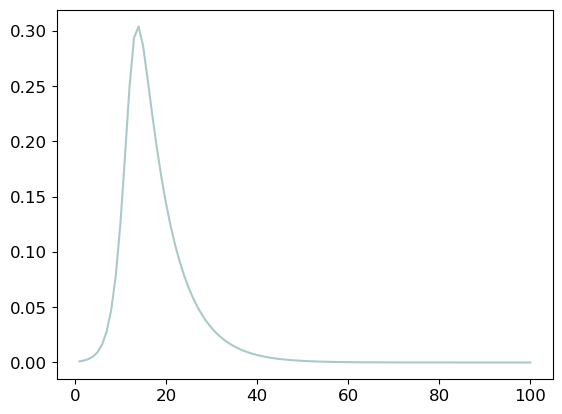

In [145]:
alpha = 1.0
temp_df = less_daily[np.isclose(less_daily.alpha, alpha)]
print(alpha)
plt.plot(
    temp_df['day'],
    temp_df['prop_infected'],
    color = homophily_color_map[alpha],
)

0.5
0.6
0.7
0.8
0.9
1.0


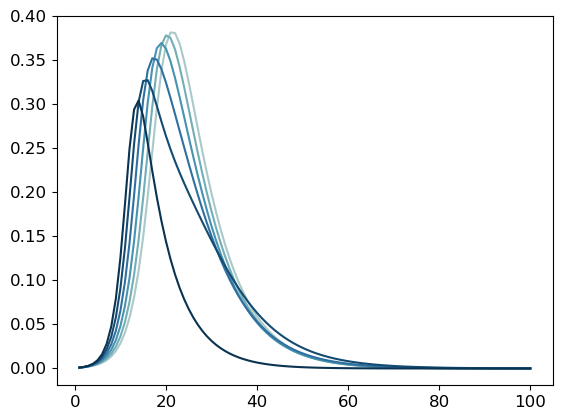

In [142]:
for alpha in less_daily.alpha.round(2).unique():
    
    temp_df = less_daily[np.isclose(less_daily.alpha, alpha)]
    print(alpha)
    plt.plot(
        temp_df['day'],
        temp_df['prop_infected'],
        color = homophily_color_map[alpha],
    )

In [138]:
less_daily.alpha.unique()

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [125]:
daily_infected_df[daily_infected_df.alpha.isin([.5, .6, .7, .8, .9, 1.0])]

,day,alpha,prop_infected
0,1,0.5,0.001000
1,2,0.5,0.001456
2,3,0.5,0.002120
3,4,0.5,0.003085
4,5,0.5,0.004486
...,...,...,...
95,96,0.5,0.000040
96,97,0.5,0.000035
97,98,0.5,0.000031
98,99,0.5,0.000027


In [128]:
daily_infected_df[daily_infected_df.alpha == .6]

,day,alpha,prop_infected


In [123]:
np.arange(.5,1.1,.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

In [129]:
daily_infected_df.alpha.unique() #isin(np.arange(.5,1.1,.1))

array([0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 ,
       0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92,
       0.94, 0.96, 0.98, 1.  ])

In [120]:
less_daily.alpha.unique()

array([0.5])

In [108]:
np.arange(.5,1.1,.1)

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

In [118]:
daily_infected_df.alpha.astype(float).unique()

array([0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 ,
       0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92,
       0.94, 0.96, 0.98, 1.  ])

In [101]:
daily_infected_df

,day,alpha,prop_infected
0,1,0.5,1.000000e-03
1,2,0.5,1.456243e-03
2,3,0.5,2.119989e-03
3,4,0.5,3.084881e-03
4,5,0.5,4.486003e-03
...,...,...,...
2595,96,1.0,1.232279e-06
2596,97,1.0,1.056678e-06
2597,98,1.0,9.060948e-07
2598,99,1.0,7.769652e-07


In [67]:
total_infected_df[col]

0     0.934227
1     0.933752
2     0.933262
3     0.932757
4     0.932236
5     0.931698
6     0.931143
7     0.930568
8     0.929972
9     0.929355
10    0.928714
11    0.928049
12    0.927356
13    0.926635
14    0.925882
15    0.925097
16    0.924276
17    0.923416
18    0.922514
19    0.921565
20    0.920565
21    0.919503
22    0.918366
23    0.917116
24    0.915613
25    0.499794
Name: total, dtype: float64

In [4]:
len(totals_dict.keys())

2

In [5]:
totals_dict['mixed'][np.round(totals_dict['mixed']['alpha'],2) == .98]

,alpha,variable,value
24,0.98,ordinary,0.300652
50,0.98,misinformed,0.497307
76,0.98,all,0.797958


In [6]:
totals_dict['mixed'][np.round(totals_dict['mixed']['alpha'],2) == .98]

,alpha,variable,value
24,0.98,ordinary,0.300652
50,0.98,misinformed,0.497307
76,0.98,all,0.797958


In [7]:
totals_dict['not mixed'][np.round(totals_dict['not mixed']['alpha'],2) == .98]

,alpha,variable,value
24,0.98,ordinary,0.300087
50,0.98,misinformed,0.497309
76,0.98,all,0.797396


In [8]:
totals_dict['not mixed'][np.round(totals_dict['not mixed']['alpha'],2) == .98]

,alpha,variable,value
24,0.98,ordinary,0.300087
50,0.98,misinformed,0.497309
76,0.98,all,0.797396


In [22]:
mixed__ = totals_dict['mixed'].copy()
not_mixed__ = totals_dict['not mixed'].copy()

In [23]:
mixed__['type'] = 'mixed'
not_mixed__['type'] = 'not mixed'

In [24]:
both_settings = pd.concat([mixed__, not_mixed__])

In [25]:
both_settings.variable.unique()

array(['ordinary', 'misinformed', 'all'], dtype=object)

In [26]:
both_settings

,alpha,variable,value,type
0,0.50,ordinary,0.367310,mixed
1,0.51,ordinary,0.366653,mixed
2,0.52,ordinary,0.365983,mixed
3,0.53,ordinary,0.365300,mixed
4,0.54,ordinary,0.364603,mixed
...,...,...,...,...
148,0.96,all,0.804127,not mixed
149,0.97,all,0.801018,not mixed
150,0.98,all,0.797396,not mixed
151,0.99,all,0.792374,not mixed


In [28]:
shape_styles = {
    'ordinary' : 'circle',
    'misinformed' : 'square',
    'all' : "triangle"
}


alt.Chart(
    both_settings[both_settings['type']=='mixed'],
).mark_point(size = 100, color='black', opacity=.5).encode(
    x = alt.X(
        'alpha:Q',
        axis = alt.Axis(format=".1f"),
        scale = alt.Scale(domain=(.48,1.02))
    ),
    y = alt.Y(
        "value",
        title="proportion of pop. infected",
        scale=alt.Scale(domain=(0,1))
    ),
#     color = alt.Color(
#         "type:N",
#         title='initial setting',
#         scale = alt.Scale(
#             domain = ['mixed', 'not mixed'],
#             range = ['black', 'red']
#         )
#     ),
    shape = alt.Shape(
        "variable:N",
        title="group",
        scale=alt.Scale(
            domain=list(shape_styles.keys()),
            range=list(shape_styles.values()),
        )
    )
).properties(width=700).configure_axis(
    titleFontSize=15,
    labelFontSize=14,
    labelAngle=0
).configure_legend(
    titleFontSize=15,
    labelFontSize=14
).display(
    scale = 2
)

alt.Chart(...)

In [14]:
mixed = alt.Chart(
    totals_dict['mixed'],
    title = 'mixed'
).mark_point().encode(
    x = alt.X(
        'alpha:Q',
        axis = alt.Axis(format=".1f"),
        scale = alt.Scale(domain=(.48,1.02))
    ),
    y = alt.Y(
        "value",
        title="proportion of pop. infected",
        scale=alt.Scale(domain=(0,1))
    ),
    color = alt.Color(
        "variable",
        title='group'
    )
).properties(width=300)

not_mixed = alt.Chart(
    totals_dict['not mixed'],
    title = 'not mixed'
).mark_point().encode(
    x = alt.X(
        'alpha:Q',
        axis = alt.Axis(format=".1f"),
        scale = alt.Scale(domain=(.48,1.02))
    ),
    y = alt.Y(
        "value",
        axis = alt.Axis(
            title=None,
#             labels=False
        ),
        scale=alt.Scale(domain=(0,1))
    ),
    color = alt.Color(
        "variable",
        title='group'
    )
).properties(width=300)

alt.hconcat(mixed, not_mixed).configure_title(
    fontSize=14,
    offset=-5
).configure_axis(
    titleFontSize=16,
    labelFontSize=14,
    labelAngle=0
).configure_legend(
    titleFontSize=15,
    labelFontSize=14
)

alt.HConcatChart(...)

### Infections over time

In [21]:
# Fraction of ordinary people
x = .5

# All beta values
beta = .3

# Less beta values highlighted for one of the later plots
alphas = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0,]


totals = []      # Total infections
r0s_ = []        # R0 valuyes
peak_days = []   # Date of each peak

# Will store the progression of infections over time, indexed by beta values
infection_flows = dict()


for alpha in alphas:

    # Run the simulation based on the input 
    S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
        frac_ord=x,
        prop_infec=.001,
        num_days=100,
        beta_ord=beta,
        recovery_days=5,
        beta_mult=3,     # Multiple the current beta value by this to get the misinfo group beta
        w_homophily=True,
        alpha=alpha,
        mixed=True,
    )
    total_ord_inf = max(R_o)
    total_mis_inf = max(R_m)

    infection_flows[alpha] = I_o

    r0s_.append( (r0s[0], r0s[1], r0s[2], alpha) )

    totals.append((alpha, total_ord_inf, total_mis_inf, total_ord_inf + total_mis_inf))


In [22]:
infections = pd.DataFrame(infection_flows).reset_index()
infections = infections.rename(columns={'index':'day'})
infections.day = infections.day +1
infections = infections.melt(id_vars='day')

infections

,day,variable,value
0,1,0.5,0.000500
1,2,0.5,0.000550
2,3,0.5,0.000650
3,4,0.5,0.000813
4,5,0.5,0.001060
...,...,...,...
595,96,1.0,0.005782
596,97,1.0,0.005370
597,98,1.0,0.004986
598,99,1.0,0.004626


In [23]:
alt.Chart(infections).mark_point(size=50).encode(
    x = alt.X(
        "day:Q",
    ),
    y = alt.Y(
        "value:Q",
        title = "proportion of pop. infected",
#         scale = alt.Scale(domain=(0,.15))
    ),
    color = alt.Color("variable:N", title='alpha'),
    shape = alt.Shape("variable:N")
).properties(
    width=600,
    height=300
).configure_axis(
    titleFontSize=16,
    labelFontSize=14
).configure_legend(
    titleFontSize=15,
    labelFontSize=13
)

alt.Chart(...)